In [5]:
# Common useful packages
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy
import spectral

# module that is useful for reloading packages
import importlib

# Scripts associated with the SML4SI textbook
import hyperspectral_gta_data as hsi_data
import scripts_M2 as sm2

# Part 1: Open the image and load the data as a numpy array.

In [6]:
# To download and use the Washington DC image:
#hsi_data.download('WashingtonDC')
#fname = 'spectral_images/WashingtonDC_Ref_156bands/WashingtonDC_Ref_156bands'

# To download and use the polymers image:
hsi_data.download('MicroscenePolymers')
fname = 'spectral_images/Microscene_Polymers/reflectance_image_polymers'

In [7]:
# Open the image and read into an array
im = spectral.envi.open(fname+'.hdr', fname)
wl = np.asarray(im.bands.centers)
# Load the image into memory
imArr = im.load()
print(f'Shape of ImArr = {imArr.shape}')
imList = np.reshape(imArr, (im.nrows*im.ncols, im.nbands))
print(f'Shape of imList = {imList.shape}')

Shape of ImArr = (852, 384, 452)
Shape of imList = (327168, 452)


# PART 2: Viewing a scatterplot of the hyperspectral image.

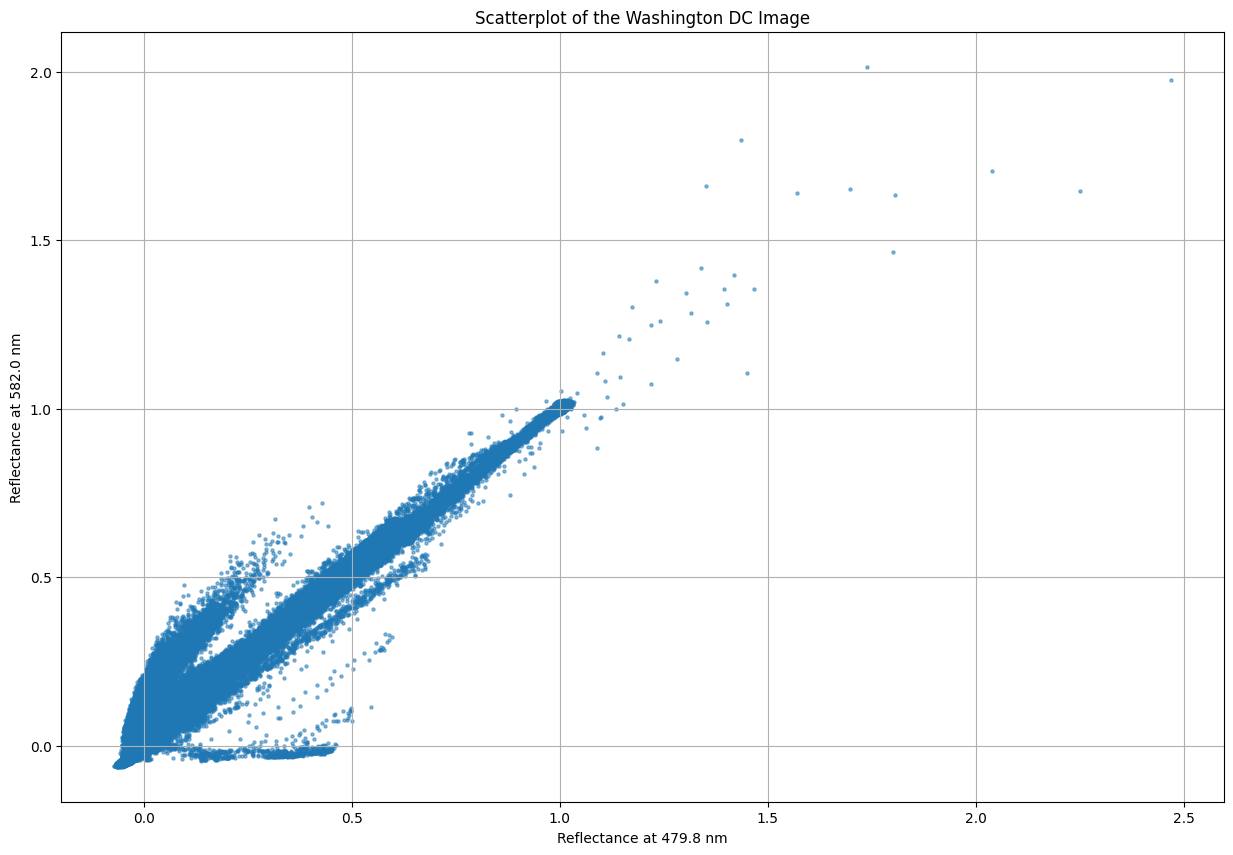

In [15]:
# Create a scatterplot of the data
i1 = 30
i2 = 60

plt.figure(figsize=(15,10))
plt.scatter(imList[:,i1], imList[:,i2], s=5, alpha=0.5);
plt.grid(True)
plt.xlabel(f'Reflectance at {wl[i1]:.1f} nm')
plt.ylabel(f'Reflectance at {wl[i2]:.1f} nm')
plt.title('Scatterplot of the Washington DC Image');

# Part 3: Clustering using K-Means

Documentation on K Means clustering using sklearn in Python: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

A discussion of 11 clustering algorithms with Python implementations is provided in: https://scikit-learn.org/stable/modules/clustering.html

In [9]:
from sklearn.cluster import KMeans
n_clusters = 5

# define the model
model = KMeans(n_clusters=n_clusters)
# fit the model
model.fit(imList)
# assign a cluster to each example
yhat = model.predict(imList)

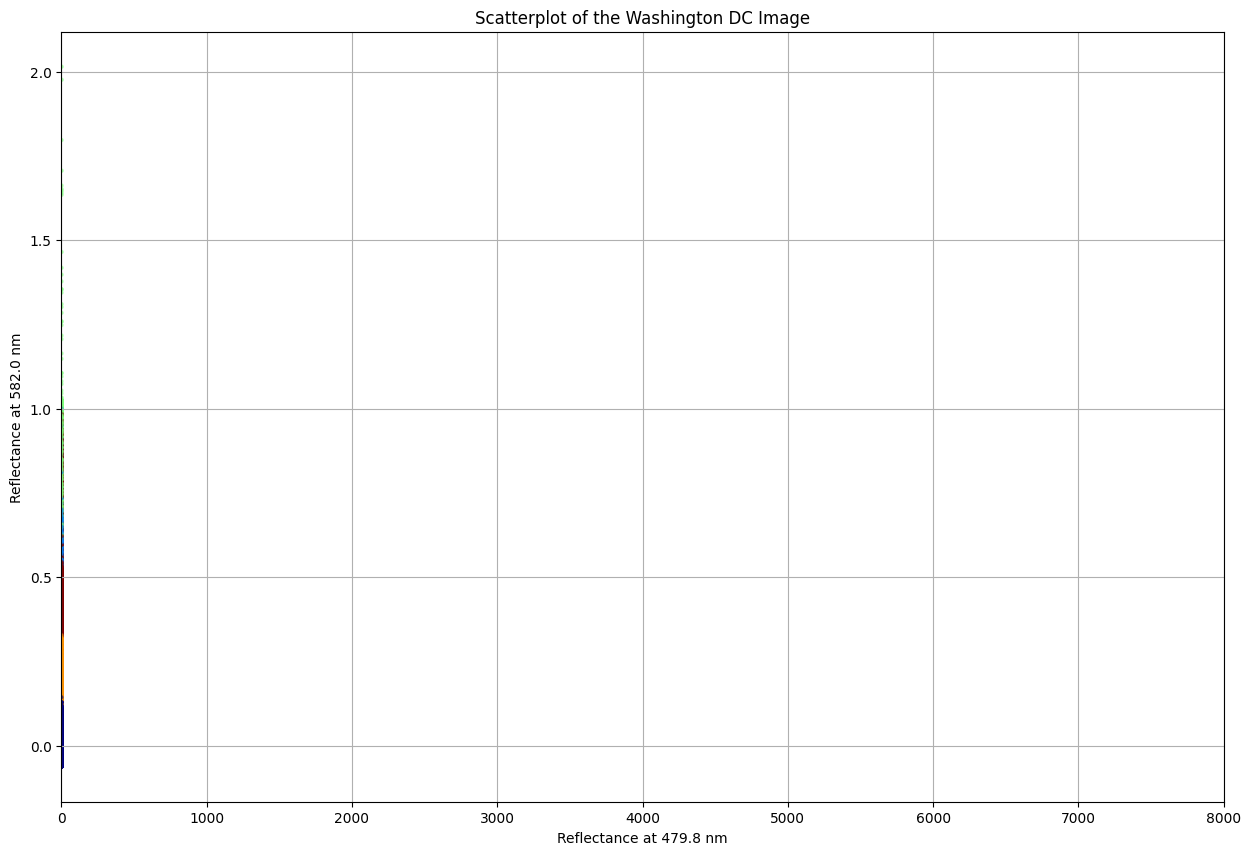

In [10]:
# Create a scatterplot of the data, colored by class
i1 = 30
i2 = 60

plt.figure(figsize=(15,10))
plt.scatter(imList[:,i1], imList[:,i2], s=5, c=yhat, alpha=0.5, cmap='jet');
plt.xlim(0,8000)
plt.grid(True)
plt.xlabel(f'Reflectance at {wl[i1]:.1f} nm')
plt.ylabel(f'Reflectance at {wl[i2]:.1f} nm')
plt.title('Scatterplot of the Washington DC Image');

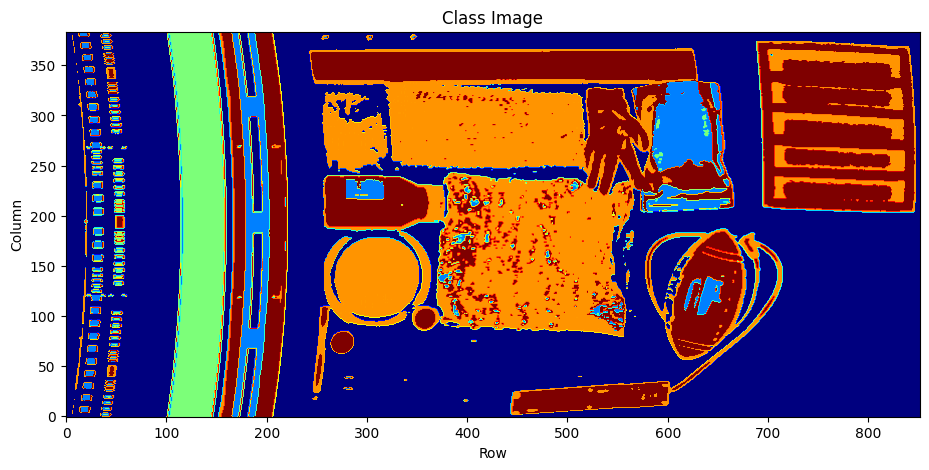

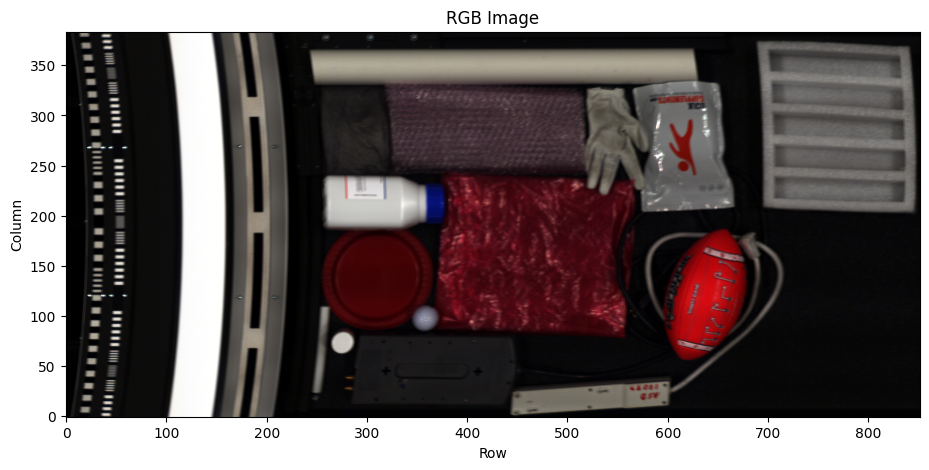

In [11]:
# Display the image, with each pixel colored by class
class_image = np.reshape(yhat, (im.nrows, im.ncols))

plt.figure(figsize=(15,5)) 
plt.imshow(np.flip(np.rot90(class_image), axis=0), cmap='jet');
plt.gca().invert_yaxis()  
plt.xlabel('Row');
plt.ylabel('Column');
plt.title('Class Image')

sm2.display_RGB(imArr, wl, rotate=True)
plt.title('RGB Image');

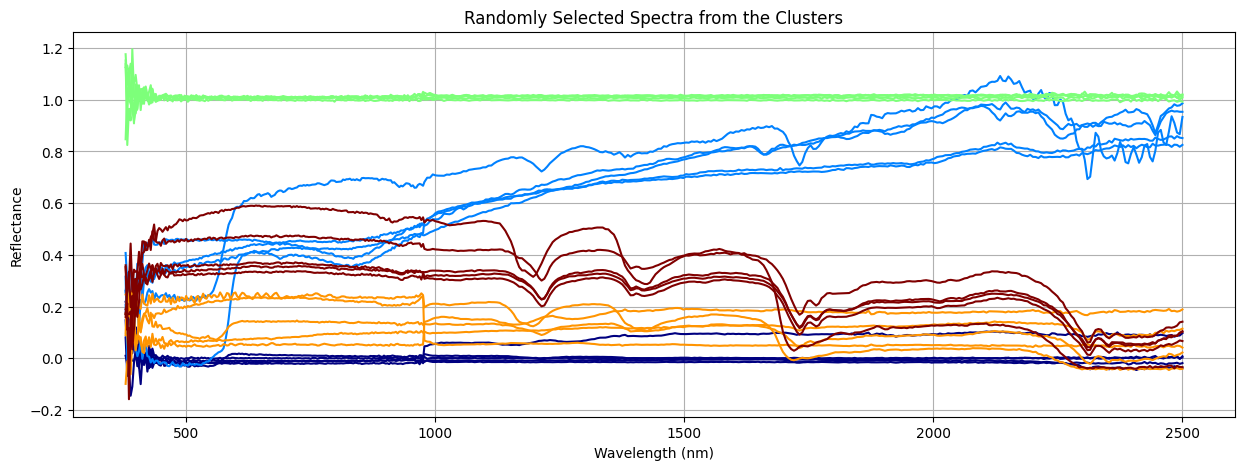

In [12]:
# Plot a few randomly selected spectra from each class
colors = plt.cm.jet(np.linspace(0,1,n_clusters)) # Create a list of colors to color the plots
N = 5 #number of spectra to plot for each class

class_labels = np.unique(yhat) # Get a list of the class labels

plt.figure(figsize=(15,5))
for lbl in class_labels:
    class_indices = np.where(yhat==lbl)[0] # get the set of indices for this class
    class_indices_subset = np.random.choice(class_indices, size=N) # get a random subset of the indices for spectra for this class
    for idx in class_indices_subset:
        plt.plot(wl, imList[idx,:], c=colors[lbl])

plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Randomly Selected Spectra from the Clusters');

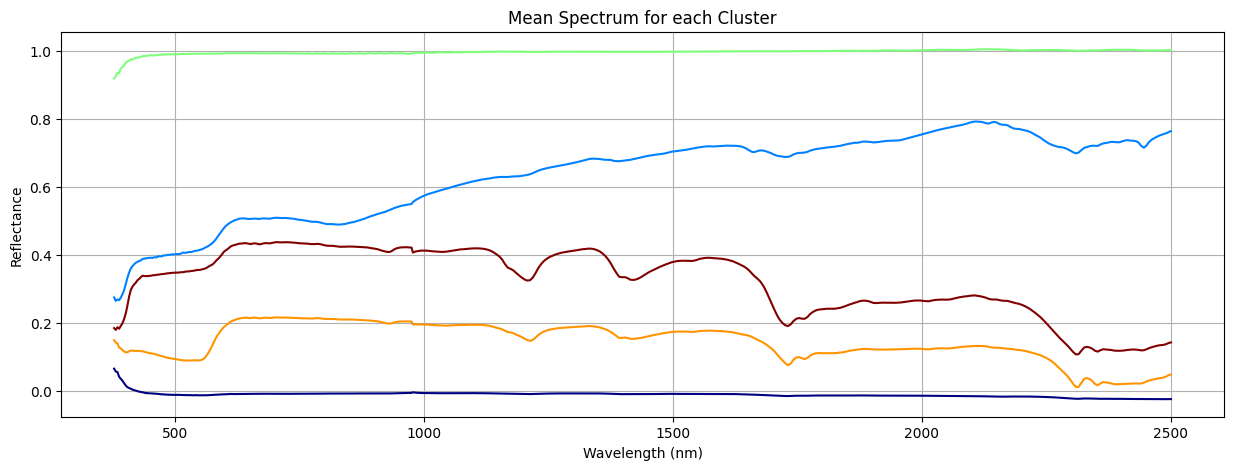

In [13]:
# Plot the mean of each class
colors = plt.cm.jet(np.linspace(0,1,n_clusters)) # Create a list of colors to color the plots

class_labels = np.unique(yhat) # Get a list of the class labels

plt.figure(figsize=(15,5))
for lbl in class_labels:
    class_indices = np.where(yhat==lbl)[0] # get the set of indices for this class
    class_mean = np.mean(imList[class_indices,:], axis=0) 
    plt.plot(wl, class_mean, c=colors[lbl])

plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Mean Spectrum for each Cluster');

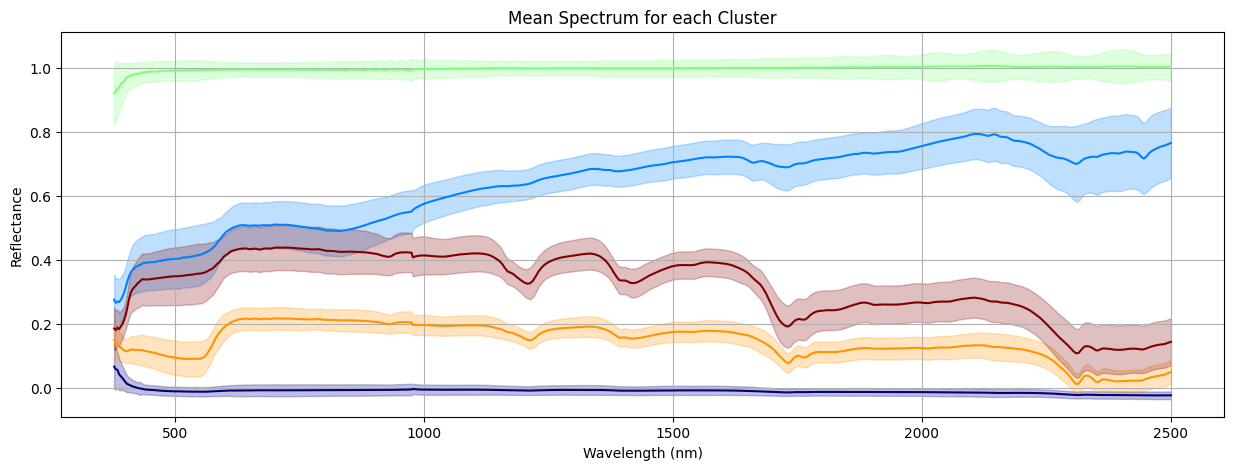

In [14]:
# Plot the mean of each class along with a 1-sigma range
colors = plt.cm.jet(np.linspace(0,1,n_clusters)) # Create a list of colors to color the plots

class_labels = np.unique(yhat) # Get a list of the class labels

plt.figure(figsize=(15,5))
for lbl in class_labels:
    class_indices = np.where(yhat==lbl)[0] # get the set of indices for this class
    class_std = np.std(imList[class_indices,:], axis=0) #
    class_mean = np.mean(imList[class_indices,:], axis=0) 
    plt.gca().fill_between(wl, class_mean+0.5*class_std, class_mean-0.5*class_std, color=colors[lbl], alpha=0.25)
    plt.plot(wl, class_mean, c=colors[lbl])

plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Mean Spectrum for each Cluster');